In [1]:
import pandas as pd

In [5]:
import numpy as np


In [18]:
Reviewdat=pd.read_csv("train.csv")
Reviewdat.shape


(38932, 5)

In [20]:
Reviewdat.head()

User_ID                                        Description  \
0  id10326  The room was kind of clean but had a VERY stro...   
1  id10327  I stayed at the Crown Plaza April -- - April -...   
2  id10328  I booked this hotel through Hotwire at the low...   
3  id10329  Stayed here with husband and sons on the way t...   
4  id10330  My girlfriends and I stayed here to celebrate ...   

        Browser_Used Device_Used Is_Response  
0               Edge      Mobile   not happy  
1  Internet Explorer      Mobile   not happy  
2            Mozilla      Tablet   not happy  
3   InternetExplorer     Desktop       happy  
4               Edge      Tablet   not happy

In [22]:
Reviewdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [23]:
Reviewdat.describe().transpose()

count unique                                                top  \
User_ID       38932  38932                                            id43616   
Description   38932  38932  I would not recommend this hotel to anyone, it...   
Browser_Used  38932     11                                            Firefox   
Device_Used   38932      3                                            Desktop   
Is_Response   38932      2                                              happy   

               freq  
User_ID           1  
Description       1  
Browser_Used   7367  
Device_Used   15026  
Is_Response   26521

In [53]:
count=Reviewdat.isnull().sum().sort_values(ascending=False)
percentage=((Reviewdat.isnull().sum()/len(Reviewdat)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,
                       keys=['Count','Percentage'])
print('Count and percentage of missing values for the coloumns:')
missing_data

Count and percentage of missing values for the coloumns:


Count  Percentage
Description                  0         0.0
Is_Response                  0         0.0
cleaned_description          0         0.0
cleaned_description_new      0         0.0

Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


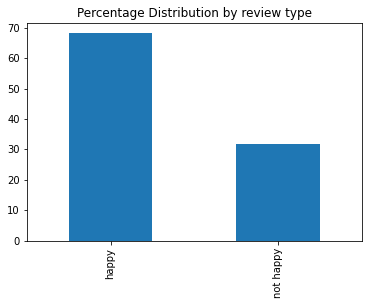

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdat.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdat.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distribution by review type')
plt.show()


In [28]:

Reviewdat.drop(columns=['User_ID','Browser_Used','Device_Used'], inplace=True)

In [29]:
import re
import string

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text
cleaned = lambda x:text_clean_1(x)

In [33]:
Reviewdat['cleaned_description'] = pd.DataFrame(Reviewdat.Description.apply(cleaned))
Reviewdat.head(10)

Description Is_Response  \
0  The room was kind of clean but had a VERY stro...   not happy   
1  I stayed at the Crown Plaza April -- - April -...   not happy   
2  I booked this hotel through Hotwire at the low...   not happy   
3  Stayed here with husband and sons on the way t...       happy   
4  My girlfriends and I stayed here to celebrate ...   not happy   
5  We had - rooms. One was very nice and clearly ...       happy   
6  My husband and I have stayed in this hotel a f...   not happy   
7  My wife & I stayed in this glorious city a whi...       happy   
8  My boyfriend and I stayed at the Fairmont on a...       happy   
9  Wonderful staff, great location, but it was de...   not happy   

                                 cleaned_description  
0  the room was kind of clean but had a very stro...  
1  i stayed at the crown plaza april   april   th...  
2  i booked this hotel through hotwire at the low...  
3  stayed here with husband and sons on the way t...  
4  my girlfriends and i stayed here to celebrate ...  
5  we had  rooms one was very nice and clearly ha...  
6  my husband and i have stayed in this hotel a f...  
7  my wife  i stayed in this glorious city a whil...  
8  my boyfriend and i stayed at the fairmont on a...  
9  wonderful staff great location but it was defi...

In [34]:
def text_clean_2(text):
    text = re.sub('\n','',text)
    return text
cleaned2 = lambda x:text_clean_2(x)

In [37]:
Reviewdat['cleaned_description_new'] = pd.DataFrame(Reviewdat['cleaned_description'].apply(cleaned2))
Reviewdat.head(10)

Description Is_Response  \
0  The room was kind of clean but had a VERY stro...   not happy   
1  I stayed at the Crown Plaza April -- - April -...   not happy   
2  I booked this hotel through Hotwire at the low...   not happy   
3  Stayed here with husband and sons on the way t...       happy   
4  My girlfriends and I stayed here to celebrate ...   not happy   
5  We had - rooms. One was very nice and clearly ...       happy   
6  My husband and I have stayed in this hotel a f...   not happy   
7  My wife & I stayed in this glorious city a whi...       happy   
8  My boyfriend and I stayed at the Fairmont on a...       happy   
9  Wonderful staff, great location, but it was de...   not happy   

                                 cleaned_description  \
0  the room was kind of clean but had a very stro...   
1  i stayed at the crown plaza april   april   th...   
2  i booked this hotel through hotwire at the low...   
3  stayed here with husband and sons on the way t...   
4  my girlfriends and i stayed here to celebrate ...   
5  we had  rooms one was very nice and clearly ha...   
6  my husband and i have stayed in this hotel a f...   
7  my wife  i stayed in this glorious city a whil...   
8  my boyfriend and i stayed at the fairmont on a...   
9  wonderful staff great location but it was defi...   

                             cleaned_description_new  
0  the room was kind of clean but had a very stro...  
1  i stayed at the crown plaza april   april   th...  
2  i booked this hotel through hotwire at the low...  
3  stayed here with husband and sons on the way t...  
4  my girlfriends and i stayed here to celebrate ...  
5  we had  rooms one was very nice and clearly ha...  
6  my husband and i have stayed in this hotel a f...  
7  my wife  i stayed in this glorious city a whil...  
8  my boyfriend and i stayed at the fairmont on a...  
9  wonderful staff great location but it was defi...

In [38]:
from sklearn.model_selection import train_test_split
Independent_var = Reviewdat.cleaned_description_new
Dependent_var = Reviewdat.Is_Response
IV_train, IV_test,DV_train, DV_test=train_test_split(Independent_var,Dependent_var,test_size = 0.1, random_state = 225)
print('IV_train :',len(IV_train))
print('IV_test :',len(IV_test))
print('DV_train :',len(DV_train))
print('DV_test :',len(IV_test))

IV_train : 35038
IV_test : 3894
DV_train : 35038
DV_test : 3894


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [46]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train,DV_train)

from sklearn.metrics import confusion_matrix

prediction = model.predict(IV_test)

confusion_matrix(prediction, DV_test)

C:\Users\AADITYA KR PASWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2417,  304],
       [ 154, 1019]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(prediction, DV_test)) 
print("Precision : ", precision_score(prediction, DV_test, DV_test, average = 'weighted'))
print("Recall : ", recall_score(prediction, DV_test, DV_test, average = 'weighted'))

Accuracy :  0.8823831535695943
Precision :  0.9092577188604481
Recall :  0.8847244304521636


C:\Users\AADITYA KR PASWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=26227        happy
12316        happy
29221        happy
25110    not happy
27692        happy
           ...    
1475     not happy
27103        happy
14429    not happy
23221        happy
10752        happy
Name: Is_Response, Length: 3894, dtype: object as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\AADITYA KR PASWAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=26227        happy
12316        happy
29221        happy
25110    not happy
27692        happy
           ...    
1475     not happy
27103        h

In [52]:
example = ["I am unhappy"]
result = model.predict(example)
print(result)

['not happy']


In [56]:
import joblib


In [57]:
joblib.dump(model,'sentiment_analysis_model.ml')

['sentiment_analysis_model.ml']